# Install the materials we need:

In [ ]:
pip install -r requirements.txt

In [2]:

####import needed modules
from appJar import gui
import pandas as pd
import matplotlib

In [3]:
import zipfile

zf = zipfile.ZipFile('meds.zip') 
meds = pd.read_csv(zf.open('meds.csv')).set_index('GeneID')
print("meds imported")
zf2 = zipfile.ZipFile('human_means.zip')
human_means = pd.read_csv(zf2.open('human_means.csv')).set_index('GeneID')
print("human_means imported")

meds imported
human_means imported


# Extract data from Allen Brain matrix

In [4]:
# Get ndArray of all column names : MOUSE
columnsNamesArr = meds.columns.values
listOfColumnNames = list(columnsNamesArr)
idx = list(meds.index)

cellList = ['Lamp5', 'Lamp5 Lhx6', 'Snc','Sncg/Ndnf',
            'Serpfin','Vip','Sst','Sst Chodl','Pvalb','PIR six',
            'DG','RSP/ACA L4/5 IT','L2/3 IT Cxcl14','L2/3 IT Cdc14a',
            'IT RHP Dcn','L2/3 IT Otof','L6 IT','L4 IT','L4/5 IT',
            'L5 IT','RSP_ACA IT Scnn1a', 'Car3','L5 ET','SUB-Sp Ndst4',
            'NP','Ly6g6e','RHP Cplx3','L6 CT','L6b','CA1sp/SUB-sp Kcnip1',
            'CA1sp','CA3sp','CR','Astro','Oligo','VLMC','Endo','SMC',
            'Macrophage']


# Get ndArray of all column names: HUMAN
human_columnsNamesArr = human_means.columns.values
human_listOfColumnNames = list(human_columnsNamesArr)
human_idx = list(human_means.index)


# Set up user interface and get user selections

In [5]:

#############choose analysis parameters##################
Outputs = {}

def excel(excel):
    return(excel)

def launch(win):
    app.showSubWindow(win, hide = True)
    app.hideSubWindow("Starter")

def glaunch(win):
    app.showSubWindow(win, hide = True)
    if win == "Mouse Genes":
        app.hideSubWindow("Mouse")
        Outputs['Cell Types'] = app.getListBox('mouse_cells')
    if win == "Human Genes":
        app.hideSubWindow("Human")
        Outputs['Cell Types'] = app.getListBox('human_cells')

def press(btn):
    app.stop()
       
def press_go(btn):
    if btn == 'Submit Human':
        geneslist =[]
        geneslist.append(app.getEntry(" Choose Gene 1"))
        geneslist.append(app.getEntry(" Choose Gene 2"))
        geneslist.append(app.getEntry(" Choose Gene 3"))
        geneslist.append(app.getEntry(" Choose Gene 4"))
        geneslist.append(app.getEntry(" Choose Gene 5"))
        geneslist.append(app.getEntry(" Choose Gene 6")) 
    elif btn == 'Submit Mouse':
        geneslist =[]
        geneslist.append(app.getEntry("Choose Gene 1 "))
        geneslist.append(app.getEntry("Choose Gene 2 "))
        geneslist.append(app.getEntry("Choose Gene 3 "))
        geneslist.append(app.getEntry("Choose Gene 4 "))
        geneslist.append(app.getEntry("Choose Gene 5 "))
        geneslist.append(app.getEntry("Choose Gene 6 ")) 
    Outputs['Genes'] = geneslist
    Outputs['Species'] = str(btn)
    app.stop()


app = gui()
app.startSubWindow("Starter")
# ##Initial gui
app.setStretch("both")
app.setOnTop(stay=True)
app.setFont(12)
app.addLabel("l0", "Welcome: Browse the Allen Transcriptomics single cell RNAseq", 0,0,4)
app.addLabel("spacer1", " ")
app.addLabel("spacer2", " ")
app.addLabel("l0a", "Human, Mouse or Both?", 1,0,4)
app.setLabelBg("l0", "purple")
app.setLabelBg("l0a", "purple")
app.setLabelFg("l0", "white")
app.setLabelFg("l0a", "white")
app.addButtons(["Human", "Mouse"], launch)
app.addCheckBox("Create excel file? If so, check box and name it below")
app.addEntry("Excel Name")
app.addButton("Cancel", press)
app.stopSubWindow()
app.showSubWindow("Starter", hide = True)

#################Gene Choice Windows

####define genes window for "Human"
app.startSubWindow("Human Genes")
app.addLabel("l2c", " Choose Genes", 4,0,4,0, "white")
app.setLabelBg("l2c", "purple")
app.setLabelFg("l2c", "white")
app.addLabel("spaceragainc", " ",5,0,4)
app.addLabel("title1c", "Gene 1:")
app.addAutoEntry(" Choose Gene 1", human_idx)
app.setAutoEntryNumRows(" Choose Gene 1", 15)
app.addLabel("title2c", "Gene 2:")
app.addAutoEntry(" Choose Gene 2", human_idx)
app.setAutoEntryNumRows(" Choose Gene 2", 15)
app.addLabel("title3c", "Gene 3:")
app.addAutoEntry(" Choose Gene 3", human_idx)
app.setAutoEntryNumRows(" Choose Gene 3", 15)
app.addLabel("title4c", "Gene 4:")
app.addAutoEntry(" Choose Gene 4", human_idx)
app.setAutoEntryNumRows(" Choose Gene 4", 15)
app.addLabel("title5c", "Gene 5:")
app.addAutoEntry(" Choose Gene 5", human_idx)
app.setAutoEntryNumRows(" Choose Gene 5", 15)
app.addLabel("title6c", "Gene 6:")
app.addAutoEntry(" Choose Gene 6", human_idx)
app.setAutoEntryNumRows(" Choose Gene 6", 15)
app.addLabel("spacer9c", " ")
app.addButton("Submit Human", press_go)
app.addButton("Cancel Human", press)
app.addLabel("spacer0c", " ")
app.stopSubWindow()

####define genes window for "Mouse"
app.startSubWindow("Mouse Genes")
app.addLabel("l2d", "Choose Genes ", 4,0,4,0, "white")
app.setLabelBg("l2d", "purple")
app.setLabelFg("l2d", "white")
app.addLabel("spaceragaind", " ",5,0,4)
app.addLabel("title1d", "Gene 1:")
app.addAutoEntry("Choose Gene 1 ", idx)
app.setAutoEntryNumRows("Choose Gene 1 ", 15)
app.addLabel("title2d", "Gene 2:")
app.addAutoEntry("Choose Gene 2 ", idx)
app.setAutoEntryNumRows("Choose Gene 2 ", 15)
app.addLabel("title3d", "Gene 3:")
app.addAutoEntry("Choose Gene 3 ", idx)
app.setAutoEntryNumRows("Choose Gene 3 ", 15)
app.addLabel("title4d", "Gene 4:")
app.addAutoEntry("Choose Gene 4 ", idx)
app.setAutoEntryNumRows("Choose Gene 4 ", 15)
app.addLabel("title5d", "Gene 5:")
app.addAutoEntry("Choose Gene 5 ", idx)
app.setAutoEntryNumRows("Choose Gene 5 ", 15)
app.addLabel("title6d", "Gene 6:")
app.addAutoEntry("Choose Gene 6 ", idx)
app.setAutoEntryNumRows("Choose Gene 6 ", 15)
app.addLabel("spacer9d", " ")
app.addButton("Submit Mouse", press_go)
app.addButton("Cancel Mouse", press)
app.addLabel("spacer0d", " ")
app.stopSubWindow()

#########################cell types windows######################################
###define human cell types window
app.startSubWindow("Human", modal=True)
app.setOnTop(stay=True)
app.addLabel("l1", "Select Human Cell Types:", 0,0,1)
app.addListBox("human_cells", human_listOfColumnNames)
app.setListBoxMulti("human_cells", multi=True)
app.addHorizontalSeparator(3,0,4)
app.addButton("Human Genes", glaunch)
app.addButton(" Cancel ", press)
app.stopSubWindow()
###define mouse cell types window
app.startSubWindow("Mouse", modal=True)
app.setOnTop(stay=True)
app.addLabel("l2", "Select Mouse Cell Types:", 0,0,1)
app.addListBox("mouse_cells", cellList)
app.setListBoxMulti("mouse_cells", multi=True)
app.addHorizontalSeparator(3,0,4)
app.addButton("Mouse Genes", glaunch)
app.addButton("Cancel ", press)
app.stopSubWindow()

app.go()
###########################################################3


2020-04-30 15:40:01,335 appJar:WARNING [799/_checkMode]: Interactive mode is not fully tested, some features might not work.
2020-04-30 15:40:01,346 appJar:WARNING [810/_checkMode]: iPython is not fully tested, some features might not work.


# Parse the data for graphing

C:\Users\dbaka\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


ValueError: Axis limits cannot be NaN or Inf

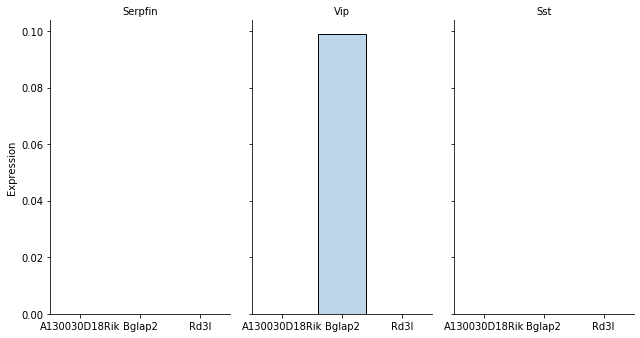

In [6]:

#########################################################
Excel = app.getCheckBox("Create excel file? If so, check box and name it below")

##clean up gene list in case you chose less than 6 genes#######
Outputs['Genes'] = list(filter(None, Outputs['Genes']))

####split the medians data by cell and gene selection############
from functools import partial, reduce 
GeneByRegion ={}
myRegion = {}

if  Outputs['Species'] == "Submit Mouse":
    for p in Outputs['Cell Types']:
        myRegion[p] = meds.filter(regex=p)
        myRegion[p]  = myRegion[p].loc[Outputs['Genes']]
        m_name = "mean_" + p
        sem_name = "sem_" + p
        regtemp = myRegion[p]
        regtemp[m_name] = myRegion[p].mean(axis=1)
        regtemp[sem_name] = myRegion[p].sem(axis=1)
        my_reduce = partial(pd.merge, on='GeneID', how='outer')                                                              
        output = reduce(my_reduce, myRegion.values())
        GeneByRegion[p] = output.iloc[:,-2]
    Outputs['means'] = output[[col for col in output.columns if "mean" in col]].reset_index().set_index('GeneID')
    # Outputs['sems'] = output[[col for col in output.columns if "sem" in col]].reset_index().set_index('GeneID')
    # # from toolz import interleave
    # # mean_and_sem = pd.concat([means, sems], axis=1)[list(interleave([means, sems]))]
                      
if  Outputs['Species'] == "Submit Human":
    for p in Outputs['Cell Types']:  
        myRegion[p] = human_means.filter(regex=p)
        myRegion[p]  = myRegion[p].loc[Outputs['Genes']]
        my_reduce = partial(pd.merge, on='GeneID', how='outer')                                                              
        output = reduce(my_reduce, myRegion.values())
        GeneByRegion[p] = output.iloc[:,-2]
    Outputs['means'] = output[[col for col in output.columns]].reset_index().set_index('GeneID')




##make a seaborn catplot from it - make the dict into a dataframe and work from that
import seaborn as sns
plotgenes = pd.DataFrame.from_dict(GeneByRegion).reset_index()
genesarray0 = plotgenes['GeneID']
genesarray = pd.Series()
for i in range(len(Outputs["Cell Types"])):
    genesarray = genesarray.append(genesarray0)
genesarray=genesarray.tolist()    
df2 = pd.concat([
    plotgenes[Outputs['Cell Types']].melt(value_name='Expression Level')], 
    axis=1)
df2['Gene'] = genesarray
maxm = max(df2["Expression Level"])



# Graph it!

In [ ]:

###Now graph it####################################################
    
sns.set_palette("Blues")
g = sns.catplot(x="Gene", y="Expression Level", col="variable",
                data=df2, saturation=.9,
                kind="bar", ci=None, aspect=.6, edgecolor="k", linewidth=1)
(g.set_axis_labels("", "Expression")
  .set_xticklabels(Outputs["Genes"])
  .set_titles("{col_name}")
  .set(ylim=(0, (maxm + 1)))
  .despine(left=True))  

for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    for p in ax.patches:
        ax.annotate('%.2f' % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 

                    ha='center', va='center', xytext=(0, 8), 
                    textcoords='offset points')


# Export Excel file of results if requested

In [7]:
###Create an excel file ##################
if Excel == True:
    FileName = app.getEntry("Excel Name")
    FileName = FileName + ".xlsx"
    df2.to_excel(FileName) 